### Trenowanie z batchami - zbiór square-simple

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from NeuralNetwork.NeuralNetwork import Net, mse
from NeuralNetwork.Layers import DenseNetLayer
from NeuralNetwork.ActivationFunctions import SigmoidFunction, LinearFunction
from NeuralNetwork.Initializers import RandomNormalInitializer
from NeuralNetwork.Optimizers import SGD

In [5]:
from NeuralNetwork.Optimizers import GradientDescentBatch

In [6]:
df = pd.read_csv("./data/regression/square-simple-training.csv", index_col=0)

X = df.x.to_numpy()
X = np.transpose(np.array([X]))
Y = df.y.to_numpy()
Y = np.transpose(np.array([Y]))

df1 = pd.read_csv("./data/regression/square-simple-test.csv", index_col=0)

X1 = df1.x.to_numpy()
X1 = np.transpose(np.array([X1]))
Y1 = df1.y.to_numpy()
Y1 = np.transpose(np.array([Y1]))

In [14]:
def create_net(batch_size):
    np.random.seed(0)
    n = Net(optimizer = GradientDescentBatch(learning_rate=0.0001, batch_size=batch_size))
    n.add_layer(DenseNetLayer(1, 5, SigmoidFunction(), RandomNormalInitializer()))
    n.add_layer(DenseNetLayer(5, 5, SigmoidFunction(), RandomNormalInitializer()))
    n.add_layer(DenseNetLayer(5, 1, LinearFunction(), RandomNormalInitializer()))
    return n

In [17]:
def train_until_mse_threshold(net, thresh):
    k = 0
    while k < 5000:
        net.optimizer.step(X, Y,
                            [layer.weights for layer in net.layers],
                            [layer.biases for layer in net.layers],
                            net.backward_step)
        mse_test = mse(Y1, net.forward(X1))
        if mse_test <= thresh:
            return k
        else:
            k += 1

In [23]:
mse_thresh = 50
batch_sizes = [1, 2, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 50]
number_of_epochs = [
    train_until_mse_threshold(
        create_net(size), mse_thresh) for size in batch_sizes
]

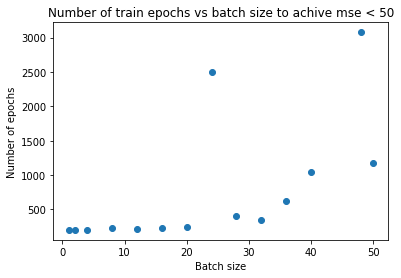

In [25]:
plt.scatter(batch_sizes, number_of_epochs)
plt.title(f"Number of train epochs vs batch size to achive mse < {mse_thresh}")
plt.xlabel("Batch size")
plt.ylabel("Number of epochs")
plt.show()

In [26]:
# Jak widać na wykresie powyżej, sieć uczyła się szybciej dla batchów o mniejszym rozmiarze